In [28]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [29]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    equation: str
    discriminant: float
    result: str

In [30]:
def show_equation(state: QuadState):
    equation = f'{state["a"]}x2 {state["b"]}x {state["c"]}'
    return {'equation': equation}

def calc_discriminant(state: QuadState):
    discriminant = state["b"]**2 - (4*state["a"]*state["c"])

    return {'discriminant': discriminant}

In [31]:
def real_roots(state: QuadState):
    root1 = (-state["b"] + state["discriminant"]**0.5) / (2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5) / (2*state["a"])
    return {'result': f'Real and Equal Roots: {root1}, {root2}'}


def repeated_roots(state: QuadState):
    root = -state["b"] / (2*state["a"])
    return {'result': f'Repeated Roots: {root}'}


def complex_roots(state: QuadState):
    result = 'No real roots'
    return {"result": result}

def check_condition(state: QuadState) -> Literal['real_roots', 'repeated_roots', 'complex_roots']:
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'complex_roots'


In [32]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calc_discriminant', calc_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('complex_roots', complex_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calc_discriminant')
graph.add_conditional_edges('calc_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('complex_roots', END)

workflow = graph.compile()


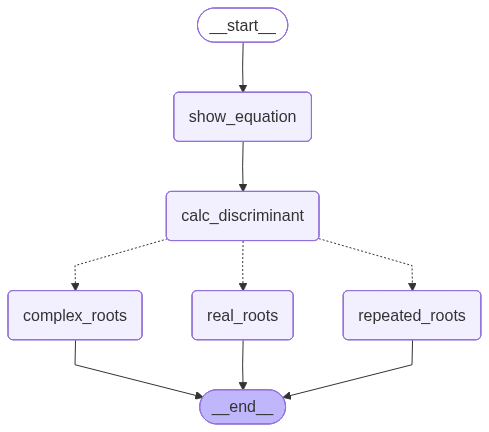

In [33]:
workflow

In [34]:
initial_state = {
    'a': 4,
    'b': -5,
    'c': -4
    
}

final_state = workflow.invoke(initial_state)

In [35]:
final_state

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2 -5x -4',
 'discriminant': 89,
 'result': 'Real and Equal Roots: 1.8042476415070754, -0.5542476415070754'}